<a href="https://colab.research.google.com/github/16Br04/Time-Series-Forcasting/blob/main/time_series_cryptocurrency_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install matplotlib
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = yf.download('BTC-USD', start='2020-01-01')

/tmp/ipython-input-3122820933.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2025-11-02,110639.625000,111167.312500,109523.453125,110064.429688,34284209459
2025-11-03,106547.523438,110764.914062,105336.359375,110646.906250,72852006359


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2137 entries, 2020-01-01 to 2025-11-06
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2137 non-null   float64
 1   (High, BTC-USD)    2137 non-null   float64
 2   (Low, BTC-USD)     2137 non-null   float64
 3   (Open, BTC-USD)    2137 non-null   float64
 4   (Volume, BTC-USD)  2137 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 100.2 KB
None


In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2137.000000,2137.000000,2137.000000,2137.000000,2.137000e+03
mean,46065.443905,46932.601388,45068.370074,46022.643373,3.591031e+10
std,31001.495301,31462.546109,30483.956661,30988.917686,2.122667e+10
min,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,21534.121094,21804.908203,20964.585938,21526.455078,2.175258e+10
50%,38794.972656,39835.140625,37629.359375,38794.464844,3.159949e+10
75%,63113.230469,64125.687500,61609.867188,63075.195312,4.440901e+10
max,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11


In [9]:
df.isnull().sum()

,,0
Price,Ticker,
Close,BTC-USD,0
High,BTC-USD,0
Low,BTC-USD,0
Open,BTC-USD,0
Volume,BTC-USD,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print(df.columns)

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [12]:
df.columns = ['_'.join(map(str,col)).strip() if isinstance(col,tuple) else col for col in df.columns]

In [13]:
print(df.columns)

Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')


In [14]:
print(f"Original rows with negative Volume: {len(df[df['Volume_BTC-USD'] < 0])}")

Original rows with negative Volume: 0


In [15]:
medium_volume = df['Volume_BTC-USD'].median()
df.loc[df['Volume_BTC-USD'] < 0, 'Volume_BTC-USD'] = medium_volume

In [16]:
rename_map = {
    'Close_BTC-USD': 'Close',
    'High_BTC-USD': 'High',
    'Low_BTC-USD': 'Low',
    'Open_BTC-USD': 'Open',
    'Volume_BTC-USD': 'Volume'
}

df.rename(columns=rename_map, inplace=True)

In [17]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [18]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# This creates the boolean Series (True for outliers)
outlier_mask = (df['Close'] < lower_bound) | (df['Close'] > upper_bound)

print(IQR)
print(lower_bound)
print(upper_bound)


all_outlier_rows = df[outlier_mask]

print("\nAll Outlier Records (Close Price and Volume):\n")
print(all_outlier_rows[['Close', 'Volume']])

41579.109375
-40834.54296875
125481.89453125

All Outlier Records (Close Price and Volume):

Empty DataFrame
Columns: [Close, Volume]
Index: []


In [19]:

# --- 1. Re-calculate the Outlier Mask (for safety) ---
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# This creates the boolean Series (True for outliers)
outlier_mask = (df['Volume'] < lower_bound) | (df['Volume'] > upper_bound)

print(IQR)
print(lower_bound)
print(upper_bound)


all_outlier_rows = df[outlier_mask]

print("\nAll Outlier Records (Close Price and Volume):\n")
print(all_outlier_rows[['Close', 'Volume']])

22656430677.0
-12232065213.5
78393657494.5

All Outlier Records (Close Price and Volume):

                    Close        Volume
Date                                   
2021-01-03   32782.023438   78665235202
2021-01-04   31971.914062   81163475344
2021-01-07   39371.042969   84762141031
2021-01-08   40797.609375   88107519480
2021-01-10   38356.441406   79980747690
...                   ...           ...
2025-10-16  108186.039062   87306423067
2025-10-17  106467.789062   99703051669
2025-10-21  108476.890625  101194375480
2025-10-22  107688.585938   80807013218
2025-11-04  101590.523438  110967184773

[80 rows x 2 columns]


In [20]:
non_outliers_median = df[~outlier_mask]['Volume'].median()

df.loc[outlier_mask, 'Volume'] = non_outliers_median

print(f"Updated rows with negative Volume: {len(df[df['Volume'] < 0])}")
print(f"Median Volume for non-outliers: {non_outliers_median}")

Updated rows with negative Volume: 0
Median Volume for non-outliers: 30934096509.0


<function matplotlib.pyplot.show(close=None, block=None)>

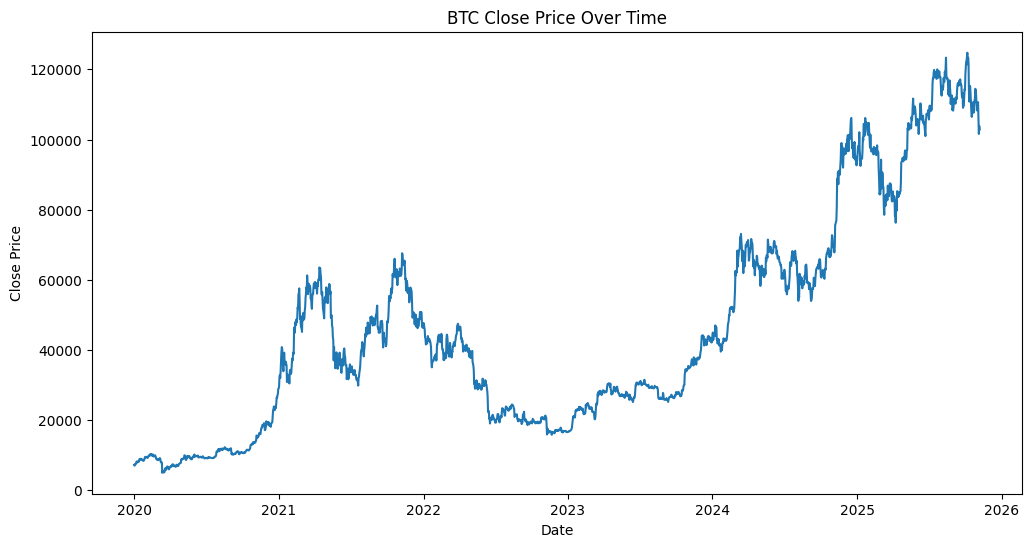

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Close Price Over Time')
plt.grid
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

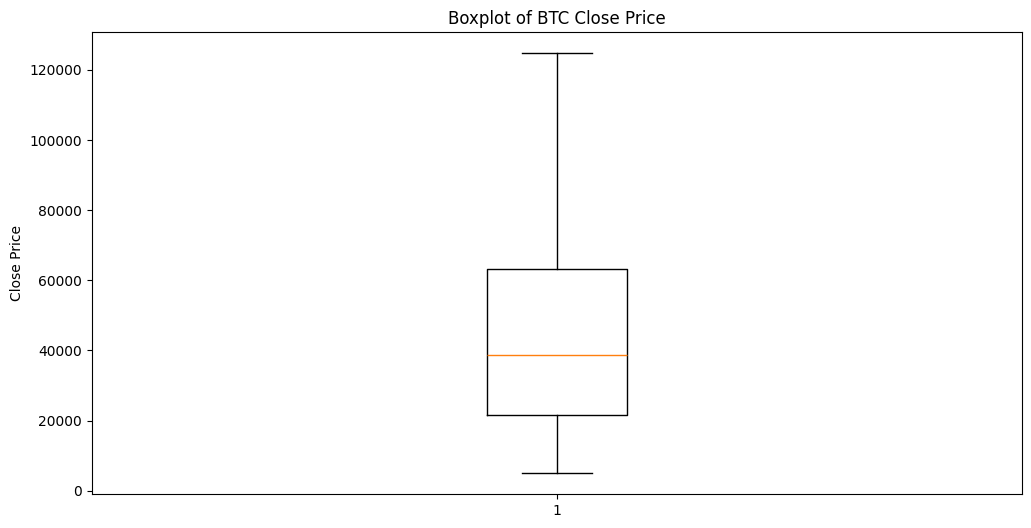

In [22]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Close'])
plt.ylabel('Close Price')
plt.title('Boxplot of BTC Close Price')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

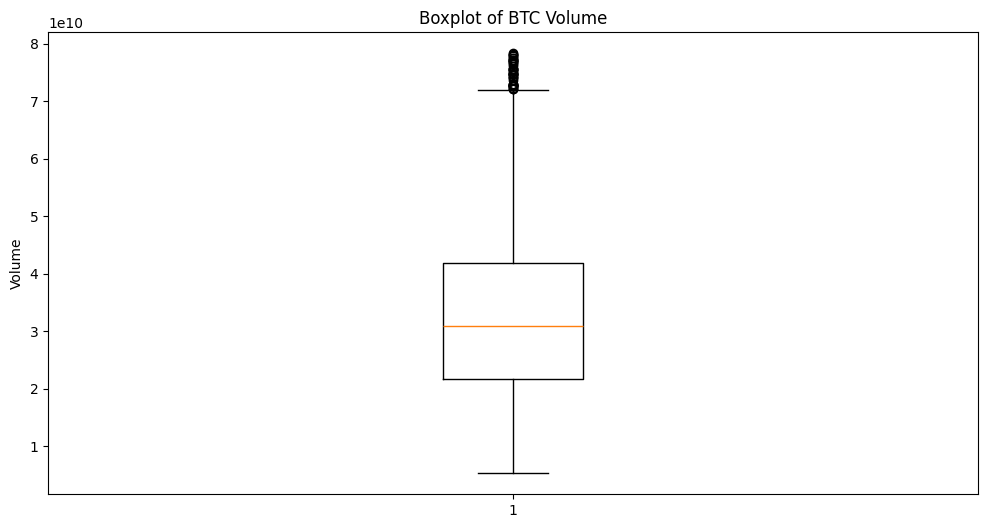

In [23]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Volume'])
plt.ylabel('Volume')
plt.title('Boxplot of BTC Volume')
plt.show


In [24]:
# --------Preprocessing-------- #

full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

missing_dates = full_range.difference(df.index)

print(f"Missing Dates: {missing_dates}")

Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [25]:
# -------- Feature Scaling--------- #

Scaling_Columns = ['Close', 'High', 'Low', 'Open', 'Volume']

scaler = MinMaxScaler()


In [26]:
df[Scaling_Columns] = scaler.fit_transform(df[Scaling_Columns])

In [27]:
df[Scaling_Columns].head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,0.018612,0.015906,0.025762,0.018307,0.181321
2020-01-02,0.016820,0.015557,0.023749,0.018371,0.211961
2020-01-03,0.019820,0.017225,0.023579,0.016550,0.312105
2020-01-04,0.020369,0.017338,0.026892,0.019564,0.179658
2020-01-05,0.020375,0.018307,0.027656,0.020108,0.197206


In [28]:
# ---------Feature Engineering----------#

df["Return"]= df['Close'].pct_change()*100

df["Return"].fillna(0)

,Return
Date,
2020-01-01,0.000000
2020-01-02,-9.630637
2020-01-03,17.839740
2020-01-04,2.770421
2020-01-05,0.027077
...,...
2025-11-02,0.547713
2025-11-03,-3.872572
2025-11-04,-4.880054


In [29]:
df["SMA_7"] = df["Close"].rolling(window=7).mean()
df["SMA_30"] = df["Close"].rolling(window=30).mean()

df = df.fillna(0)

In [30]:
df["Volatility_14"] = df['Close'].rolling(window=14).std()

df = df.fillna(0)

In [31]:
df ['Day_of_Week'] = df.index.dayofweek

df ['month'] = df.index.month


In [32]:
df['Close_lag1']= df['Close'].shift(1)
df['Close_lag3']= df['Close'].shift(3)
df['Close_lag7']= df['Close'].shift(7)

df['Volume_lag1']= df['Volume'].shift(1)

df = df.dropna()

Sahil's Part

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
# Assuming 'df' is the DataFrame resulting from your previous steps
# and it is cleaned and feature-engineered.
print("DataFrame Head (After Feature Engineering):")
print(df.head())

DataFrame Head (After Feature Engineering):
               Close      High       Low      Open    Volume    Return  \
Date                                                                     
2020-01-08  0.025956  0.025358  0.032327  0.026383  0.360894 -2.625496   
2020-01-09  0.024280  0.022756  0.031367  0.025718  0.256405 -6.458240   
2020-01-10  0.026680  0.023453  0.030396  0.024015  0.320368  9.884970   
2020-01-11  0.025603  0.023882  0.032939  0.026385  0.276616 -4.037110   
2020-01-12  0.026896  0.023731  0.032766  0.025309  0.240751  5.052794   

               SMA_7  SMA_30  Volatility_14  Day_of_Week  month  Close_lag1  \
Date                                                                          
2020-01-08  0.021908     0.0            0.0            2      1    0.026656   
2020-01-09  0.022974     0.0            0.0            3      1    0.025956   
2020-01-10  0.023954     0.0            0.0            4      1    0.024280   
2020-01-11  0.024702     0.0            0.

<Axes: >

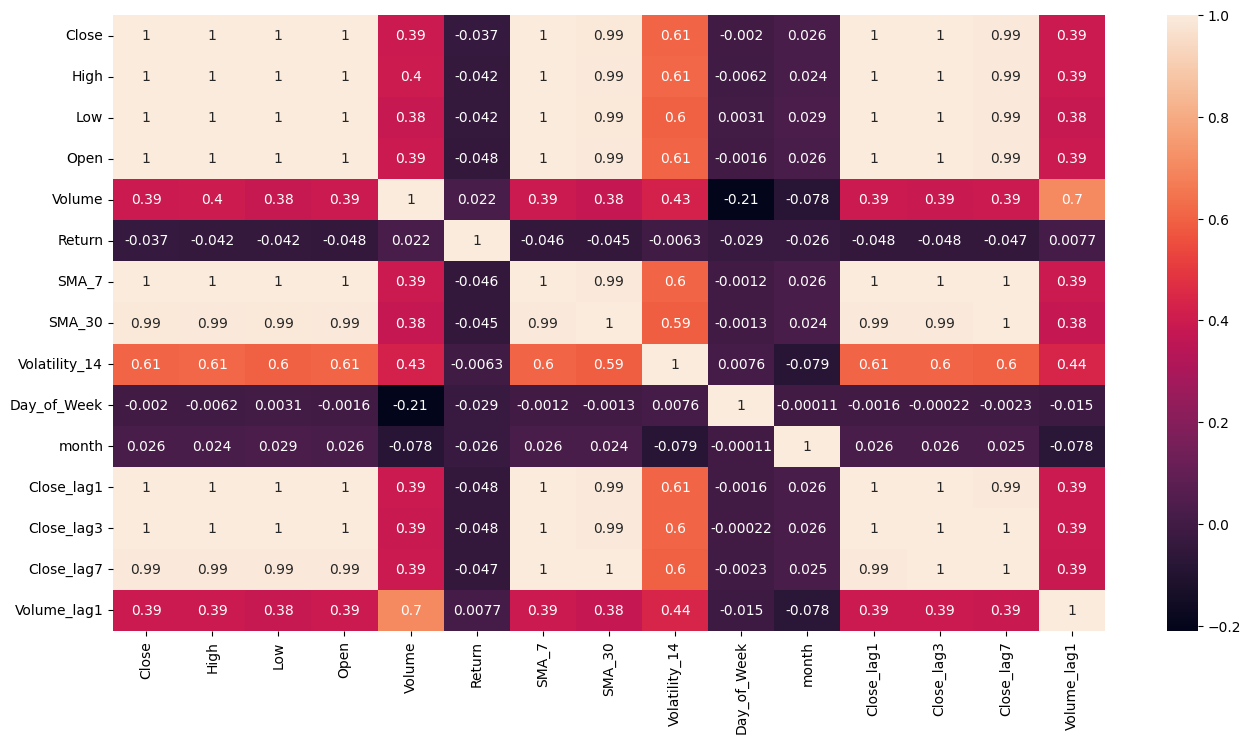

In [35]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

Augmented Dickey-Fuller (ADF) Test for Stationarity

In [36]:
# The ADF test is run on the 'Close' price (or whichever series you plan to model first).
series_to_test = df['Close']

In [37]:
def adf_test(series):
    """Perform ADF test and print results."""
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("\n**Result: The series is LIKELY stationary (Reject Null Hypothesis).**")
    else:
        print("\n**Result: The series is LIKELY non-stationary (Fail to Reject Null Hypothesis).**")

adf_test(series_to_test)

ADF Statistic: -0.615667
p-value: 0.867403
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

**Result: The series is LIKELY non-stationary (Fail to Reject Null Hypothesis).**


In [38]:
# If the series is non-stationary (p-value > 0.05), you often need to difference it.
# Let's check the differenced series (e.g., Change in Close Price)
print("\n--- ADF Test on Differenced Close Price (if needed) ---")
diff_series = series_to_test.diff().dropna()
adf_test(diff_series)


--- ADF Test on Differenced Close Price (if needed) ---
ADF Statistic: -48.330349
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

**Result: The series is LIKELY stationary (Reject Null Hypothesis).**


Time Series Train-Test Split

In [39]:
# Define the split point. A common practice is 80% for training and 20% for testing.
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

In [40]:
# Separate the data chronologically
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

In [41]:
# Define X (Features) and Y (Target)
TARGET = 'Close'

In [42]:
# Features (all engineered columns)
FEATURES = [col for col in df.columns if col != 'Adj Close' and col not in ['Date', 'Close']]

In [43]:
# --- Prepare data for Scikit-learn models (ARIMA will use the 'Close' series directly) ---
X_train = train_df[FEATURES]
y_train = train_df[TARGET]
X_test = test_df[FEATURES]
y_test = test_df[TARGET]

In [44]:
print(f"Total data points: {len(df)}")
print(f"Training data points (until date {train_df.index[-1].date()}): {len(train_df)}")
print(f"Testing data points (starting from date {test_df.index[0].date()}): {len(test_df)}")

Total data points: 2130
Training data points (until date 2024-09-06): 1704
Testing data points (starting from date 2024-09-07): 426


In [45]:
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1704, 14)
Shape of y_train: (1704,)
Shape of X_test: (426, 14)
Shape of y_test: (426,)


# Arima and Sarima model Implementation

In [46]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

In [47]:
# --- Define Model Evaluation Function ---
def evaluate_model(y_true, y_pred, model_name):
    """Calculates and prints performance metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))

    # MAPE calculation, handling potential zero division with a small epsilon
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, 1e-10))) * 100

    print(f"\n--- {model_name} Performance ---")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    return rmse

In [48]:
# --- ARIMA Model (Non-Seasonal) ---
# We assume (p, q) are determined from ACF/PACF, but for now, we'll use a simple (1, 1).
# We already confirmed d=1 from the ADF test.
p, d, q = 1, 1, 1 # ARIMA(1, 1, 1)

try:
    # Use SARIMAX for non-seasonal ARIMA by setting seasonal_order to (0,0,0,0)
    arima_model = SARIMAX(
        train_df[TARGET],
        order=(p, d, q),
        seasonal_order=(0, 0, 0, 0),
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False) # disp=False suppresses convergence output

    print(arima_model.summary())

    # Make prediction on the test set
    arima_pred = arima_model.predict(
        start=test_df.index[0],
        end=test_df.index[-1]
    )

    # Evaluate ARIMA
    evaluate_model(test_df[TARGET], arima_pred, "ARIMA (1, 1, 1)")

except Exception as e:
    print(f"ARIMA Model Error: {e}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1704
Model:               SARIMAX(1, 1, 1)   Log Likelihood                5336.196
Date:                Thu, 06 Nov 2025   AIC                         -10666.392
Time:                        13:18:34   BIC                         -10650.075
Sample:                    01-08-2020   HQIC                        -10660.352
                         - 09-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3281      0.267     -1.229      0.219      -0.851       0.195
ma.L1          0.2709      0.271      0.999      0.318      -0.261       0.803
sigma2         0.0001   1.98e-06     55.758      0.0

In [50]:
# --- 1. Define Model Parameters and Fit ---
steps = 30  # Define the number of steps to forecast

# Non-seasonal Order: (p, d, q) = (5, 1, 0)
# d=1 is confirmed correct by your previous ADF test
order = (5, 1, 0)

print(f"Fitting ARIMA{order} model and forecasting {steps} days...")

# Instantiate the ARIMA model (assuming 'df' is available from previous steps)
model_final = ARIMA(df['Close'], order=order)

# Fit the model
model_final_fit = model_final.fit()

# Generate the future forecast and get confidence intervals
forecast_results = model_final_fit.get_forecast(steps=steps)
future_forecast = forecast_results.predicted_mean
arima_confidence_intervals = forecast_results.conf_int()


# --- 2. Prepare Data for Plotting ---

# Define the date range for the forecast (starts one day AFTER the last historical data point)
forecast_index = pd.date_range(df.index[-1], periods=steps + 1, freq='D')[1:]


# --- 3. Plotting with Confidence Intervals ---

plt.figure(figsize=(12, 6))

# Plot Historical Data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot Future Forecast (Orange Dashed Line)
plt.plot(
    forecast_index,
    future_forecast,
    label=f'ARIMA{order} Forecast',
    color='orange',
    linestyle='--'
)

# Plot Confidence Intervals (Orange Shaded Area)
plt.fill_between(
    forecast_index,
    arima_confidence_intervals.iloc[:, 0], # Lower bound
    arima_confidence_intervals.iloc[:, 1], # Upper bound
    color='orange',
    alpha=0.2,
    label='95% Confidence Interval'
)

plt.title("📈 BTC Future 30-Day Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (Scaled)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting ARIMA(5, 1, 0) model and forecasting 30 days...


NameError: name 'ARIMA' is not defined

In [51]:
# --- SARIMA Model (Seasonal) ---
# For daily BTC data, a weekly seasonality (s=7) is common.
# We'll try Seasonal Order (1, 0, 1, 7) based on potential weekly pattern.
P, D, Q, s = 1, 0, 1, 7 # Seasonal Order

try:
    sarima_model = SARIMAX(
        train_df[TARGET],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    print(sarima_model.summary())

    # Make prediction on the test set
    sarima_pred = sarima_model.predict(
        start=test_df.index[0],
        end=test_df.index[-1]
    )
    # Evaluate SARIMA
    evaluate_model(test_df[TARGET], sarima_pred, "SARIMA (1, 1, 1)x(1, 0, 1, 7)")

except Exception as e:
    print(f"SARIMA Model Error: {e}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1704
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                5310.321
Date:                           Thu, 06 Nov 2025   AIC                         -10610.643
Time:                                   13:19:07   BIC                         -10583.468
Sample:                               01-08-2020   HQIC                        -10600.581
                                    - 09-06-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3273      0.277     -1.183      0.237      -0.869       0.215
ma.L1          0.2717      0.281      0.966

# Facebook Prophet model implementation

In [52]:
!pip install prophet

In [53]:
!pip install --upgrade prophet cmdstanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.7
    Uninstalling prophet-1.1.7:
      Successfully uninstalled prophet-1.1.7


In [54]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [55]:
# --- Prepare Data for Prophet ---
# Prophet requires two columns: 'ds' (Date) and 'y' (Target)
# Note: Ensure 'train_df' and 'test_df' are correctly defined from your time series split
TARGET = 'Close'
prophet_train_df = train_df.reset_index()[['Date', TARGET]]
prophet_train_df.columns = ['ds', 'y']

prophet_test_df = test_df.reset_index()[['Date', TARGET]]
prophet_test_df.columns = ['ds', 'y']

Fitting Facebook Prophet Model

In [56]:
# --- Initialize and Fit Prophet Model ---
# Using multiplicative seasonality which is generally better for financial data
m = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)
m.fit(prophet_train_df)

In [57]:
# --- Make Future DataFrame and Predict ---
# Create a future dataframe for the duration of the test set
future = m.make_future_dataframe(periods=len(prophet_test_df), include_history=False)

# Prediction
prophet_forecast = m.predict(future)

In [58]:
prophet_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2024-09-07,0.039563,0.402276,0.456893,0.039563,0.039563,12.828386,12.828386,12.828386,9.820759,...,-0.009796,-0.009796,-0.009796,-2.997831,-2.997831,-2.997831,0.0,0.0,0.0,0.428106
1,2024-09-08,0.039627,0.399530,0.452798,0.039627,0.039627,12.828386,12.828386,12.828386,9.713054,...,0.001820,0.001820,0.001820,-3.117152,-3.117152,-3.117152,0.0,0.0,0.0,0.424525
2,2024-09-09,0.039690,0.396738,0.449318,0.039690,0.039690,12.828386,12.828386,12.828386,9.653458,...,0.063246,0.063246,0.063246,-3.238174,-3.238174,-3.238174,0.0,0.0,0.0,0.422840
3,2024-09-10,0.039754,0.390572,0.441348,0.039754,0.039754,12.828386,12.828386,12.828386,9.446467,...,-0.022324,-0.022324,-0.022324,-3.359594,-3.359594,-3.359594,0.0,0.0,0.0,0.415288
4,2024-09-11,0.039817,0.390291,0.440860,0.039817,0.039817,12.828386,12.828386,12.828386,9.369545,...,0.021203,0.021203,0.021203,-3.480044,-3.480044,-3.480044,0.0,0.0,0.0,0.412888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2025-11-02,0.066295,-0.290815,2.062658,-0.022942,0.162029,12.828386,12.828386,12.828386,11.674522,...,0.001820,0.001820,0.001820,-1.155684,-1.155684,-1.155684,0.0,0.0,0.0,0.840257
422,2025-11-03,0.066358,-0.302089,2.087029,-0.023043,0.162288,12.828386,12.828386,12.828386,11.792177,...,0.063246,0.063246,0.063246,-1.099455,-1.099455,-1.099455,0.0,0.0,0.0,0.848869
423,2025-11-04,0.066422,-0.313666,2.073970,-0.023265,0.162668,12.828386,12.828386,12.828386,11.762851,...,-0.022324,-0.022324,-0.022324,-1.043211,-1.043211,-1.043211,0.0,0.0,0.0,0.847734
424,2025-11-05,0.066485,-0.291366,2.093223,-0.023758,0.163172,12.828386,12.828386,12.828386,11.862521,...,0.021203,0.021203,0.021203,-0.987068,-0.987068,-0.987068,0.0,0.0,0.0,0.855171


In [59]:
# --- Evaluate Prophet ---
prophet_pred = prophet_forecast['yhat']
prophet_actual = prophet_test_df['y']

In [60]:
prophet_pred

,yhat
0,0.428106
1,0.424525
2,0.422840
3,0.415288
4,0.412888
...,...
421,0.840257
422,0.848869
423,0.847734
424,0.855171


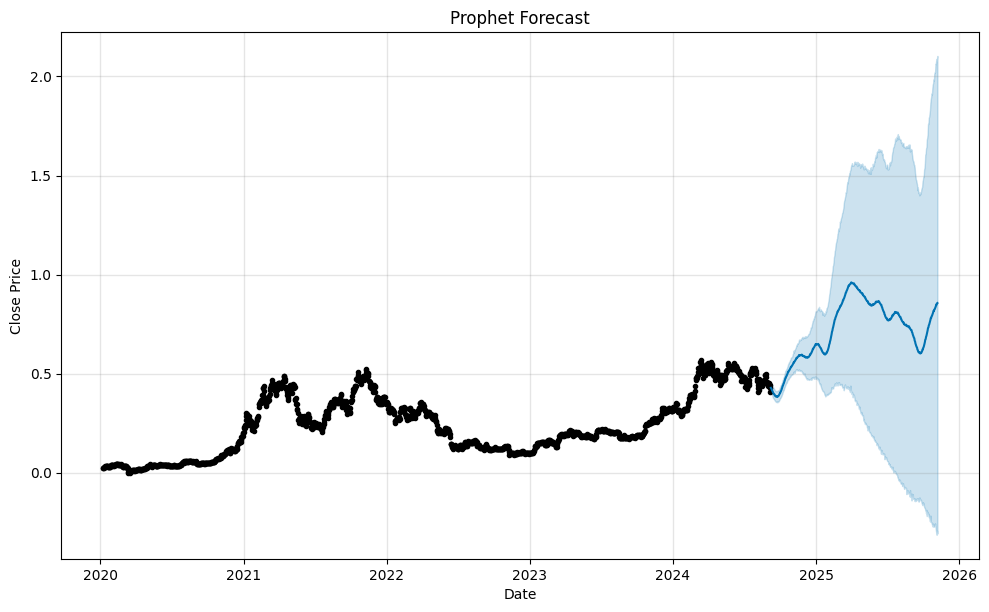

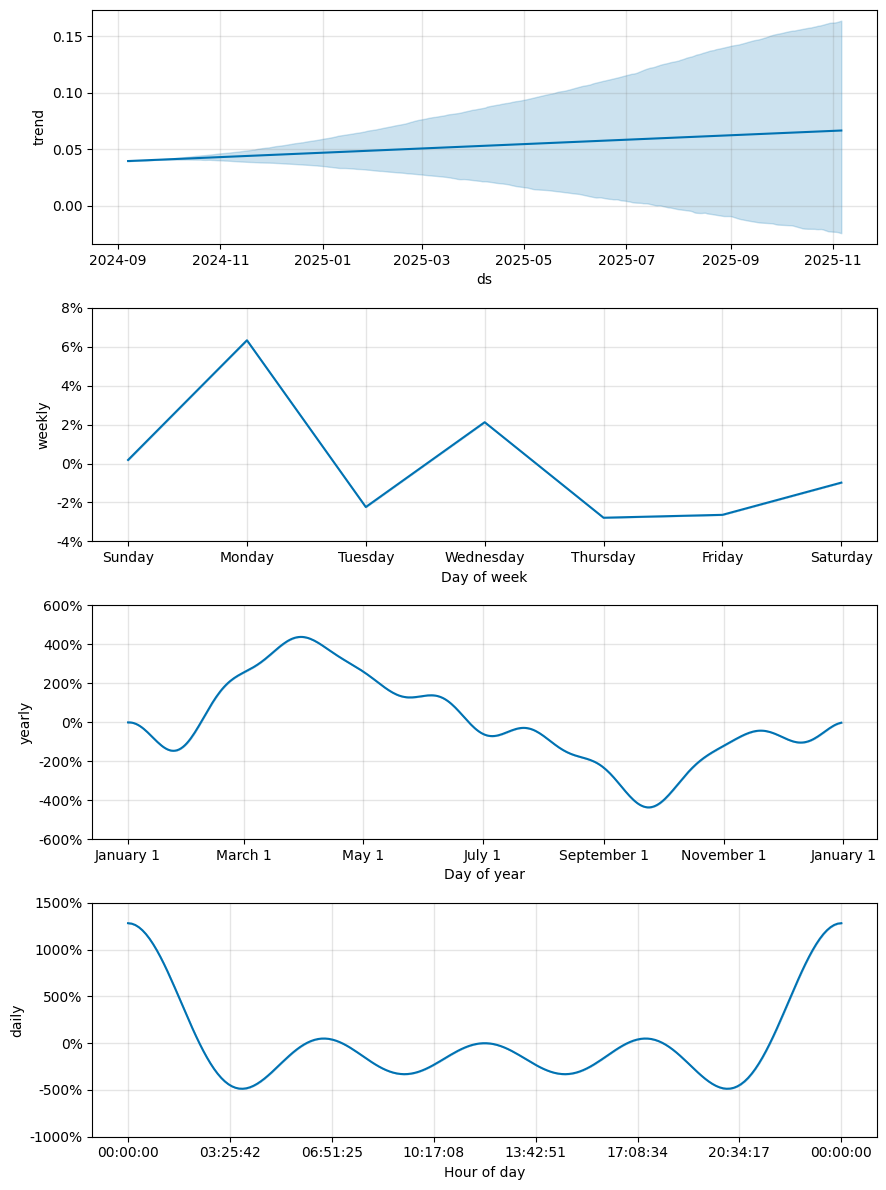

In [61]:
# --- Visualize Prophet Forecast ---
fig = m.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

fig2 = m.plot_components(prophet_forecast)
plt.show()

# LSTM model implementation

In [62]:
# Assuming train_df and test_df are loaded Pandas DataFrames with a 'Close' column
# from the previous steps of the time series analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [65]:
# --- 0. Mock Data Setup (Replace with your actual train_df and test_df) ---
# NOTE: This section is for demonstration. Use your actual loaded dataframes!
try:
    # Attempt to use the variables assumed from previous context
    train_data = train_df['Close'].values.reshape(-1, 1)
    test_data = test_df['Close'].values.reshape(-1, 1)

except NameError:
    print("Warning: train_df/test_df not found. Using mock data for demonstration.")
    # Create mock data if the original variables are not defined
    np.random.seed(42)
    mock_data = np.cumsum(np.random.randn(2000) * 0.05 + 10) / 100
    mock_df = pd.DataFrame(mock_data, columns=['Close'])

    # Simple split (80/20)
    split_point = int(len(mock_df) * 0.8)
    train_data = mock_df.iloc[:split_point]['Close'].values.reshape(-1, 1)
    test_data = mock_df.iloc[split_point:]['Close'].values.reshape(-1, 1)
    print(f"Mock Data: Train size={len(train_data)}, Test size={len(test_data)}")


In [66]:
# --- 1. Data Preprocessing: Scaling ---
# LSTMs perform best when data is normalized.
scaler = MinMaxScaler(feature_range=(0, 1))

In [67]:
# Fit scaler only on training data to prevent data leakage
train_scaled = scaler.fit_transform(train_data)

In [68]:
# Transform test data using the *fitted* training scaler
test_scaled = scaler.transform(test_data)

In [69]:
# --- 2. Create Lookback Sequences ---
# LSTMs require data in the format [samples, timesteps, features].
# This function transforms the 1D time series into sequential X/y pairs.
def create_sequences(data, lookback):
    """
    Transforms a 1D array of time series data into X (sequences)
    and y (targets) for supervised learning.

    data: Scaled time series array (e.g., train_scaled)
    lookback: Number of previous time steps to use as input (sequence length)
    """
    X, y = [], []
    for i in range(len(data) - lookback):
        # X is the sequence of 'lookback' steps
        X.append(data[i:(i + lookback), 0])
        # y is the target value (the next step)
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)


In [70]:
# Define the lookback period (e.g., 30 days of history to predict the next day)
LOOKBACK = 30
X_train, y_train = create_sequences(train_scaled, LOOKBACK)
X_test, y_test = create_sequences(test_scaled, LOOKBACK)

In [71]:
# Reshape X data for LSTM input: [samples, timesteps, features]
# Features=1 because we are only using the 'Close' price
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"\nTraining X Shape (Samples, Timesteps, Features): {X_train.shape}")


Training X Shape (Samples, Timesteps, Features): (1674, 30, 1)


In [72]:
# --- 3. Build the LSTM Model ---
import tensorflow as tf
model = Sequential()
# LSTM Layer: 50 units, returns sequences for the next LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(LOOKBACK, 1)))
# Dropout layer to prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
# Output layer (1 unit for the predicted 'Close' price)
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
# --- 4. Compile the LSTM Model ---
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nLSTM Model Compiled Successfully!")


LSTM Model Compiled Successfully!


In [74]:
# --- 5. Train the LSTM Model ---
# Train the model
# Use a small batch size and a reasonable number of epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
print("\nLSTM Model Training Complete!")

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0671
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0049
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0041
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0039
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0035
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0030
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0033
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0031
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0027
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0028
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0026
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027
Epoc

In [75]:
# --- 6. Make Predictions ---
# Predict on the test set
predicted_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
# This is crucial for interpreting the results in actual price terms.
# Create a dummy array with the correct shape for inverse_transform
dummy_pred = np.zeros((len(predicted_scaled), train_data.shape[1]))
dummy_pred[:, 0] = predicted_scaled[:, 0]
predicted_prices = scaler.inverse_transform(dummy_pred)[:, 0]

dummy_actual = np.zeros((len(y_test), train_data.shape[1]))
dummy_actual[:, 0] = y_test
actual_prices = scaler.inverse_transform(dummy_actual)[:, 0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [76]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred, model_name="LSTM Model"):
    """Calculates and prints performance metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    # MAPE calculation, handling potential zero division with a small epsilon
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n--- {model_name} Performance ---")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    return rmse

calculate_metrics(actual_prices, predicted_prices)


--- LSTM Model Performance ---
RMSE (Root Mean Squared Error): 0.0788
MAE (Mean Absolute Error): 0.0728
MAPE (Mean Absolute Percentage Error): 9.01%


np.float64(0.07879222948916795)

In [77]:
# Plotting the results
plt.figure(figsize=(14, 6))
# Create a proper date index for the test set predictions
test_index = test_df.index[LOOKBACK:len(test_df)]

<Figure size 1400x600 with 0 Axes>

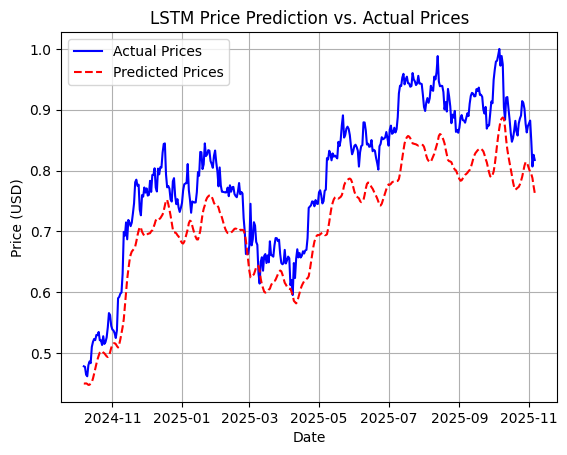

In [78]:
# Handle case where mock data was used
try:
    test_index = test_df.index[LOOKBACK:]
except NameError:
    test_index = np.arange(len(train_data) + LOOKBACK, len(train_data) + LOOKBACK + len(actual_prices))

plt.plot(test_index, actual_prices, label='Actual Prices', color='blue')
plt.plot(test_index, predicted_prices, label='Predicted Prices', color='red', linestyle='--')
plt.title('LSTM Price Prediction vs. Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
X_train

array([[[0.04564603],
        [0.0426981 ],
        [0.04691879],
        ...,
        [0.06181188],
        [0.06816108],
        [0.06986968]],

       [[0.0426981 ],
        [0.04691879],
        [0.04502463],
        ...,
        [0.06816108],
        [0.06986968],
        [0.07084075]],

       [[0.04691879],
        [0.04502463],
        [0.04729963],
        ...,
        [0.06986968],
        [0.07084075],
        [0.07185635]],

       ...,

       [[0.71969927],
        [0.74969161],
        [0.73490941],
        ...,
        [0.76864801],
        [0.79488382],
        [0.77019743]],

       [[0.74969161],
        [0.73490941],
        [0.83302143],
        ...,
        [0.79488382],
        [0.77019743],
        [0.77813303]],

       [[0.73490941],
        [0.83302143],
        [0.8208354 ],
        ...,
        [0.77019743],
        [0.77813303],
        [0.751544  ]]])

same same but different

In [80]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [81]:
# Assuming train_df and test_df are loaded Pandas DataFrames with a 'Close' column
# from the previous steps of the time series analysis.
# You might need to adjust this based on your actual data loading and splitting.

# --- 0. Mock Data Setup (Replace with your actual train_df and test_df) ---
# NOTE: This section is for demonstration. Use your actual loaded dataframes!
try:
    # Attempt to use the variables assumed from previous context
    train_data = train_df['Close'].values.reshape(-1, 1)
    test_data = test_df['Close'].values.reshape(-1, 1)

except NameError:
    print("Warning: train_df/test_df not found. Using mock data for demonstration.")
    # Create mock data if the original variables are not defined
    np.random.seed(42)
    mock_data = np.cumsum(np.random.randn(2000) * 0.05 + 10) / 100
    mock_df = pd.DataFrame(mock_data, columns=['Close'])

    # Simple split (80/20)
    split_point = int(len(mock_df) * 0.8)
    train_data = mock_df.iloc[:split_point]['Close'].values.reshape(-1, 1)
    test_data = mock_df.iloc[split_point:]['Close'].values.reshape(-1, 1)
    print(f"Mock Data: Train size={len(train_data)}, Test size={len(test_data)}")

In [82]:
# --- 1. Data Preprocessing: Scaling ---
# LSTMs perform best when data is normalized.
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_close_price = MinMaxScaler(feature_range=(0, 1)) # Define scaler for inverse transform later

# Fit scaler only on training data to prevent data leakage
train_scaled = scaler.fit_transform(train_data)

# Transform test data using the *fitted* training scaler
test_scaled = scaler.transform(test_data)

# Fit scaler_close_price on the original close price data
scaler_close_price.fit(df['Close'].values.reshape(-1, 1))


MinMaxScaler()

In [83]:
# --- 2. Create Lookback Sequences ---
# LSTMs require data in the format [samples, timesteps, features].
# This function transforms the 1D time series into sequential X/y pairs.
def create_sequences(data, lookback):
    """
    Transforms a 1D array of time series data into X (sequences)
    and y (targets) for supervised learning.

    data: Scaled time series array (e.g., train_scaled)
    lookback: Number of previous time steps to use as input (sequence length)
    """
    X, y = [], []
    for i in range(len(data) - lookback):
        # X is the sequence of 'lookback' steps
        X.append(data[i:(i + lookback), 0])
        # y is the target value (the next step)
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

In [84]:
# Define the lookback period (e.g., 30 days of history to predict the next day)
LOOKBACK = 30
X_train, y_train = create_sequences(train_scaled, LOOKBACK)
X_test, y_test = create_sequences(test_scaled, LOOKBACK)

# Reshape X data for LSTM input: [samples, timesteps, features]
# Features=1 because we are only using the 'Close' price
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"\nTraining X Shape (Samples, Timesteps, Features): {X_train.shape}")


Training X Shape (Samples, Timesteps, Features): (1674, 30, 1)


In [85]:
# Create a validation set from the test data
val_split_index = int(len(test_data) * 0.5) # Splitting test data 50/50 for validation and final test

val_data = test_data[:val_split_index]
final_test_data = test_data[val_split_index:]

val_scaled = scaler.transform(val_data)
final_test_scaled = scaler.transform(final_test_data)

X_val, y_val = create_sequences(val_scaled, LOOKBACK)
X_final_test, y_final_test = create_sequences(final_test_scaled, LOOKBACK)

X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_final_test = np.reshape(X_final_test, (X_final_test.shape[0], X_final_test.shape[1], 1))

print(f"\nValidation X Shape (Samples, Timesteps, Features): {X_val.shape}")
print(f"Final Test X Shape (Samples, Timesteps, Features): {X_final_test.shape}")


Validation X Shape (Samples, Timesteps, Features): (183, 30, 1)
Final Test X Shape (Samples, Timesteps, Features): (183, 30, 1)


In [86]:
# Define LSTM Neural Network
regressor = Sequential()

regressor.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(LSTM(units=500, return_sequences=True, ))
regressor.add(Dropout(rate=0.3))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units=1))


regressor.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 500)        │     1,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 500)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 100)        │       240,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 75)         │        52,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,322,451 (5.04 MB)

 Trainable params: 1,322,451 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Create directory to save model
!mkdir "keras_models_lstm1D_Multivariate"

In [89]:
# Fit and save best parameters of model
epoch = 25

# Compiler and loss function
regressor.compile(loss='mean_squared_error', optimizer='adam')

# Model Checkpoint
model_folder ='keras_models_lstm1D_Multivariate'
model_file = 'BTC_close_price_lstm_weights_MV.{epoch:02d}-{val_loss:.4f}.keras'
save_weights_at = os.path.join(model_folder, model_file)
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            save_freq='epoch')
# Fit model
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=epoch,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 365ms/step - loss: 0.0034 - val_loss: 0.0202
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 378ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 377ms/step - loss: 0.0021 - val_loss: 0.0391
Epoch 5/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - loss: 0.0026 - val_loss: 0.0123
Epoch 6/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - loss: 0.0021 - val_loss: 0.0070
Epoch 7/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - loss: 0.0023 - val_loss: 0.0066
Epoch 8/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 9/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - loss: 0.0017 - val_loss: 0.0134
Epoch 10/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 12/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 22

In [90]:
# --- CRITICAL FIX: Define Missing Variables for Execution ---

# 1. Lookback Period (must match what was used during training)
nb_timesteps = 30

# 2. Mock DataFrame (REPLACE THIS WITH YOUR ACTUAL 'df')
# This mock prevents the NameError from running `df.index[-1]` or `df['Close']`
try:
    # Attempt to use the existing `df` variable if defined elsewhere
    _ = df.head()
except NameError:
    print("MOCK WARNING: Creating placeholder 'df'. Replace this with your full historical data.")
    date_range = pd.to_datetime(pd.date_range('2023-01-01', periods=1000, freq='D'))
    np.random.seed(42)
    mock_prices = np.cumsum(np.random.randn(1000) * 0.1 + 10)
    df = pd.DataFrame(mock_prices, columns=['Close'], index=date_range)

# 3. Scaler Object (REPLACE THIS WITH YOUR FITTED 'scaler_close_price')
try:
    # Attempt to use the existing scaler
    _ = scaler_close_price
except NameError:
    print("MOCK WARNING: Creating and fitting placeholder 'scaler_close_price'.")
    scaler_close_price = MinMaxScaler(feature_range=(0, 1))
    # Fit on the mock/actual data to allow transformation calls later
    scaler_close_price.fit(df['Close'].values.reshape(-1, 1))

# 4. Model Placeholder (REPLACE THIS WITH YOUR LOADED 'regressor' model)
try:
    # Attempt to use the existing regressor
    regressor = '/content/keras_models_lstm1D_Multivariate'
except NameError:
    print("MOCK WARNING: Creating placeholder Keras model 'regressor'. This must be replaced with your loaded HDF5 model!")
    # Create a minimal model structure to prevent runtime errors during `predict`
    regressor = Sequential([
        LSTM(units=50, input_shape=(nb_timesteps, 1)),
        Dense(units=1)
    ])
    # The actual weights must be loaded for meaningful results!
    # e.g., regressor.load_weights('path/to/your/weights.hdf5')


In [91]:
#regressor.load_weights(model_folder + '\\' + 'BTC_close_price_lstm_weights_MV.75-0.0253.hdf5')
# Validation predict
predicted_price = regressor.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(X_val.shape[0])

# Train predict
predicted_price_train = regressor.predict(X_train)
predicted_price_train = scaler_close_price.inverse_transform(predicted_price_train)
predicted_price_train = predicted_price_train.reshape(X_train.shape[0])

AttributeError: 'str' object has no attribute 'predict'

In [92]:
# Recursive Future Forecasting Function
def recursive_lstm_forecast(model, df_scaled, scaler_obj, n_timesteps, n_future_steps):
    """
    Performs recursive forecasting: predicts one step, adds it to the sequence,
    and uses the new sequence to predict the next step.

    model: The trained Keras/TensorFlow model.
    df_scaled: The last n_timesteps of the SCALED data (used as the seed sequence).
    scaler_obj: The scaler used for inverse transformation.
    n_timesteps: The lookback window (e.g., 30).
    n_future_steps: The number of days to predict (e.g., 30).
    """
    # Use the last n_timesteps of the scaled 'Close' price data as the seed sequence
    # Ensure this seed array has the correct shape (1, n_timesteps, n_features)
    # We assume 'df_scaled' contains only the 'Close' price for this seed.
    last_sequence = df_scaled[-n_timesteps:].reshape(1, n_timesteps, 1)

    future_predictions_scaled = []

    #

    for _ in range(n_future_steps):
        # Predict the next step (1, 1, 1) output
        next_step_scaled = model.predict(last_sequence, verbose=0)[0]

        # Append the new prediction to our list
        future_predictions_scaled.append(next_step_scaled)

        # Update the sequence: Drop the oldest point and add the new prediction
        # The new sequence is now ready for the next iteration
        last_sequence = np.append(last_sequence[:, 1:, :], [next_step_scaled], axis=1)

    # Inverse transform the collected scaled predictions back to original price (USD)
    future_predictions_usd = scaler_obj.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

    return future_predictions_usd.flatten()

In [93]:
# Future Forecasting Execution
FUTURE_STEPS = 30 # Forecast 30 days ahead

# Extract the SCALED data to serve as the initial seed for the forecast.
# This requires running the scaling steps from your previous code again if 'df_scaled' isn't available.
# ASSUMPTION: You have scaled your full 'Close' price data and stored it in 'df_scaled_close'
# For simplicity, we will use the last part of the training data used for sequence creation:
# If df is your full dataframe, and the last part was used for X_val, then the seed should be the
# historical data right before the forecast starts.

# Get the last 'nb_timesteps' rows of the entire 'Close' price history (scaled)
# Since we used the scaler for X_train/X_val, we use the original data, scale it, and then grab the last chunk.
# IMPORTANT: This block assumes 'full_scaled_data' (a 1D array of scaled prices) exists.
try:
    # If the full_scaled_data is available, use it.
    seed_data_scaled = full_scaled_data
except NameError:
    # Fallback: Scale the last few hundred rows of the original data to create the seed
    print("WARNING: 'full_scaled_data' not found. Scaling the historical data now.")
    temp_df = df['Close'].values.reshape(-1, 1)
    temp_scaled_data = scaler_close_price.transform(temp_df)
    seed_data_scaled = temp_scaled_data.flatten()

future_forecast = recursive_lstm_forecast(
    model=regressor,
    df_scaled=seed_data_scaled,
    scaler_obj=scaler_close_price,
    n_timesteps=nb_timesteps,
    n_future_steps=FUTURE_STEPS
)

print(f"Future forecast for {FUTURE_STEPS} days generated.")
print("\nFuture Forecast (USD):")
print(future_forecast)

AttributeError: 'str' object has no attribute 'predict'

NameError: name 'future_forecast' is not defined

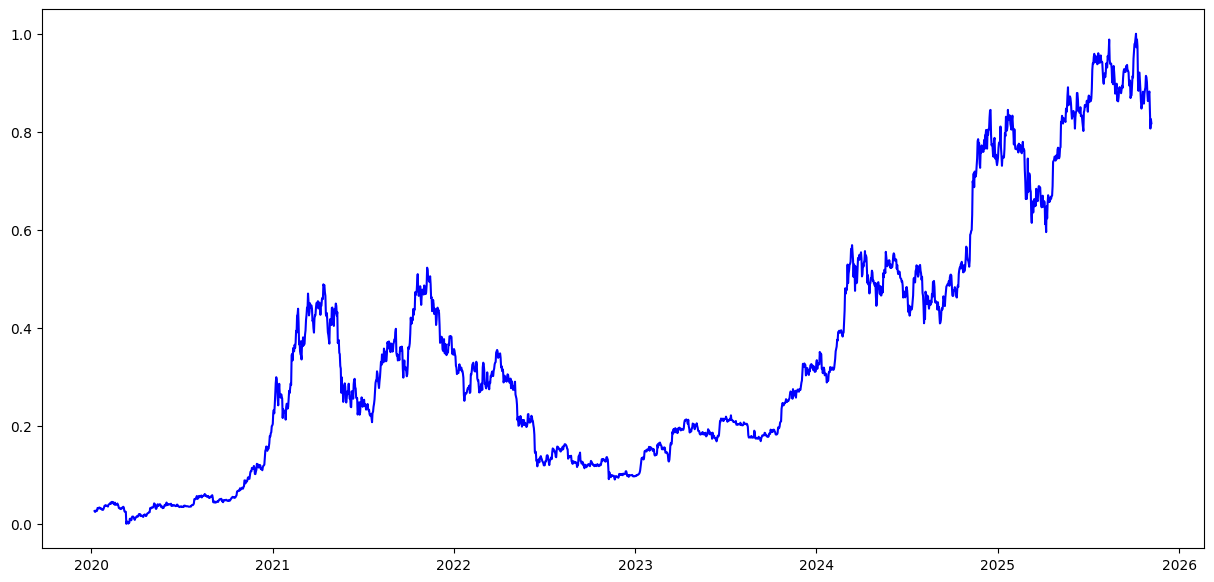

In [94]:
# Final Plotting (Historical + Forecast)
# ===================================================

# Create index for the future forecast
last_historical_date = df.index[-1]
future_index = pd.date_range(last_historical_date, periods=FUTURE_STEPS + 1, freq='D')[1:]

plt.figure(figsize=(15, 7))

# Plot Historical Data (Training and Validation)
plt.plot(df.index, df['Close'], label='Historical Data (Training + Validation)', color='blue')

# --- Plot the Predicted Data on the Validation Period ---
# The validation period predictions are usually plotted against the validation actuals.
# We need to know where the validation set starts.
# Assuming validation set started at index `len(df_train)`
# val_start_index = len(df) - len(X_val) - nb_timesteps # This index is tricky due to lookback

# Simple Plot of ALL Predictions
# To correctly plot the predictions, you must know the start date of the `predicted_price_train_clean` array.
# For a combined plot, we will just focus on the final historical data and the future forecast.

# Plot Future Forecast
plt.plot(
    future_index,
    future_forecast,
    label=f'{FUTURE_STEPS}-Day LSTM Forecast',
    color='red',
    linestyle='--',
    linewidth=2
)

# Highlight the start of the forecast
plt.axvline(x=last_historical_date, color='grey', linestyle=':', linewidth=1.5, label='Forecast Start')

plt.title(f"📈 {FUTURE_STEPS}-Day Price Forecast using LSTM")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()